In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [37]:
header_list = ["x1","x2","y"]
df = pd.read_csv('Student-University.csv', names = header_list)
df.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [38]:
X = df[df.columns[0:2]]
y = df[df.columns[2]]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

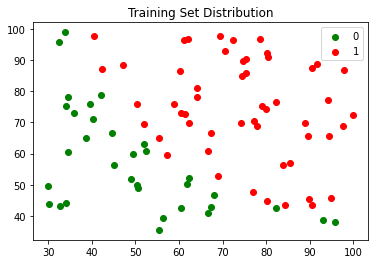

In [40]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='g', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='1')
plt.title("Training Set Distribution")
plt.legend();

In [41]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [42]:
model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


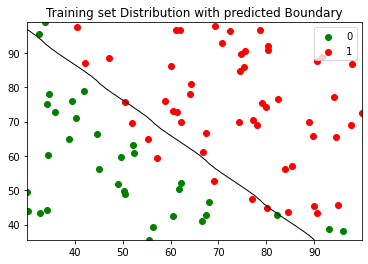

In [43]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='g', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='1')
plt.title("Training set Distribution with predicted Boundary")
plt.legend();
x1_min, x1_max = X_train[:,0].min(), X_train[:,0].max(),
x2_min, x2_max = X_train[:,1].min(), X_train[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [44]:
preds = model.predict(X_test)
preds

array([1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [45]:
print("Accuracy: "+str(accuracy_score(y_test, preds)))
print("Precision: "+str(precision_score(y_test, preds, average='micro')))
print("Recall: "+str(recall_score(y_test, preds, average='micro')))
print("F1: "+str(f1_score(y_test, preds, average='micro')))

Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1: 0.9333333333333333


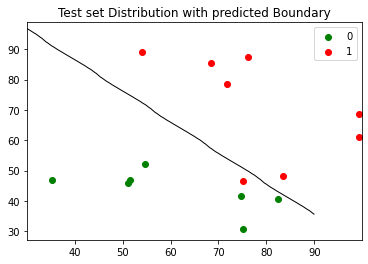

In [46]:
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='g', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='r', label='1')
plt.title("Test set Distribution with predicted Boundary")
plt.legend();
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');